Презентация исследования для инвесторов: https://drive.google.com/file/d/1okm7t8Ec-kS0nImsnyFCGN7Skwl70yjg/view?usp=share_link

Проект в Google Colab: https://drive.google.com/file/d/1r5ps8utz8OnhC3UTwHE7YJIFRetIeOEG/view?usp=sharing

# Проектная работа  
# Рынок заведений общественного питания Москвы  
## Описание проекта  
Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.  
Для начала они просят вас — аналитика — подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.  
Постарайтесь сделать презентацию информативной и лаконичной. Её структура и оформление сильно влияют на восприятие информации читателями вашего исследования. Выбирать инструменты (matplotlib, seaborn и другие) и типы визуализаций вы можете самостоятельно.  
Вам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.  
## Описание данных  
Файл moscow_places.csv:  
  
name — название заведения;  
address — адрес заведения;  
category — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
hours — информация о днях и часах работы;  
lat — широта географической точки, в которой находится заведение;  
lng — долгота географической точки, в которой находится заведение;  
rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
«Средний счёт: 1000–1500 ₽»;  
«Цена чашки капучино: 130–220 ₽»;  
«Цена бокала пива: 400–600 ₽».  
и так далее;  
middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.  
middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.  
chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
0 — заведение не является сетевым  
1 — заведение является сетевым  
district — административный район, в котором находится заведение, например Центральный административный округ;  
seats — количество посадочных мест.

## Выполнение проекта

### Шаг 1. Загрузите данные и изучите общую информацию

In [ ]:
#!pip install folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import folium
from folium import Marker
from folium import Map, Choropleth # импортируем карту и хороплет
from folium.plugins import MarkerCluster # импортируем кластер

In [ ]:
df = pd.read_csv('https://code.s3.yandex.net//datasets/moscow_places.csv')

In [ ]:
def data_info(dataframe):
   display(dataframe.head()),
   display(dataframe.describe()),
   dataframe.info(),
   print('Количество явных дубликатов:', dataframe.duplicated().sum()),
   print(),
   print('Доля явных дубликатов:', '{:.2%}'.format((dataframe.duplicated().sum() / len(dataframe)))),
   print(),
   print('Количество пропущенных значений:'),
   print(dataframe.isna().sum())

In [ ]:
data_info(df)

name  category                              address  \
0                WoWфли      кафе           Москва, улица Дыбенко, 7/1   
1        Четыре комнаты  ресторан   Москва, улица Дыбенко, 36, корп. 1   
2                 Хазри      кафе       Москва, Клязьминская улица, 15   
3  Dormouse Coffee Shop   кофейня  Москва, улица Маршала Федоренко, 12   
4             Иль Марко  пиццерия      Москва, Правобережная улица, 1Б   

                          district  \
0  Северный административный округ   
1  Северный административный округ   
2  Северный административный округ   
3  Северный административный округ   
4  Северный административный округ   

                                               hours        lat        lng  \
0                             ежедневно, 10:00–22:00  55.878494  37.478860   
1                             ежедневно, 10:00–22:00  55.875801  37.484479   
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...  55.889146  37.525901   
3                             ежедневно, 09:00–22:00  55.881608  37.488860   
4                             ежедневно, 10:00–22:00  55.881166  37.449357   

   rating          price                       avg_bill  middle_avg_bill  \
0     5.0            NaN                            NaN              NaN   
1     4.5  выше среднего       Средний счёт:1500–1600 ₽           1550.0   
2     4.6        средние         Средний счёт:от 1000 ₽           1000.0   
3     5.0            NaN  Цена чашки капучино:155–185 ₽              NaN   
4     5.0        средние         Средний счёт:400–600 ₽            500.0   

   middle_coffee_cup  chain  seats  
0                NaN      0    NaN  
1                NaN      0    4.0  
2                NaN      0   45.0  
3              170.0      0    NaN  
4                NaN      1  148.0

lat          lng       rating  middle_avg_bill  \
count  8406.000000  8406.000000  8406.000000      3149.000000   
mean     55.750109    37.608570     4.229895       958.053668   
std       0.069658     0.098597     0.470348      1009.732845   
min      55.573942    37.355651     1.000000         0.000000   
25%      55.705155    37.538583     4.100000       375.000000   
50%      55.753425    37.605246     4.300000       750.000000   
75%      55.795041    37.664792     4.400000      1250.000000   
max      55.928943    37.874466     5.000000     35000.000000   

       middle_coffee_cup        chain        seats  
count         535.000000  8406.000000  4795.000000  
mean          174.721495     0.381275   108.421689  
std            88.951103     0.485729   122.833396  
min            60.000000     0.000000     0.000000  
25%           124.500000     0.000000    40.000000  
50%           169.000000     0.000000    75.000000  
75%           225.000000     1.000000   140.000000  
max          1568.000000     1.000000  1288.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB
Количество явных дубликатов: 0

Доля явных дубликатов: 0.00%


Изучили общую информацию о датасете. Представлено 8406 заведений общественного питания Москвы. Почти все столбцы хранят значения типа object и float64, явных дубликатов не обнаружено, 6 столбцов имеют пропущенные значения.

### Шаг 2. Выполните предобработку данных  
Явных дубликатов в таблице нет. Переведем столбцы name и address в нижний регистр и проверим количество неявных дубликатов:

In [ ]:
df['name2'] = df['name'].str.lower()
df['address2'] = df['address'].str.lower()

In [ ]:
dup = df[['name2', 'address2']].duplicated().sum()
print('Количество неявных дубликатов:', dup)

Количество неявных дубликатов: 4


Поскольку их всего 4, исключим такие строки из таблицы:

In [ ]:
df = df.drop_duplicates(subset=['name2','address2']).reset_index(drop=True)

Пропуски встречаются в шести столбцах - hours, price, avg_bill, middle_avg_bill, middle_coffee_cup и seats. Пропусков слишком много, чтоб их удалить, замена на медиану может исказить результат анализа, поэтому оставим всё, как есть.

Выполним предобработку данных:

In [ ]:
df['street'] = [x.split(', ')[1] for x in df['address'].values] # создание столбца street с названиями улиц из столбца с адресом

In [ ]:
df['is_24_7'] = df['hours'].str.contains('ежедневно, круглосуточно') # создание столбца is_24/7 с обозначением, что заведение работает ежедневно и круглосуточно (24/7)

### Шаг 3. Анализ данных  
1) Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Ответьте на вопрос о распределении заведений по категориям.  

In [ ]:
food = df.groupby(by='category')['name'].count().reset_index().sort_values(by='name', ascending=False)

fig = px.bar(food, x='category', y='name', title='Заведения общественного питания по категориям')
fig.update_xaxes(title_text='Категория')
fig.update_yaxes(title_text='Количество объектов')
fig.show()

В датасете больше всего представлено заведений общественного питания типа "кафе", "ресторан" и "кофейня", и меньше всего "булочных" и "столовых".

2) Исследуйте количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Проанализируйте результаты и сделайте выводы.

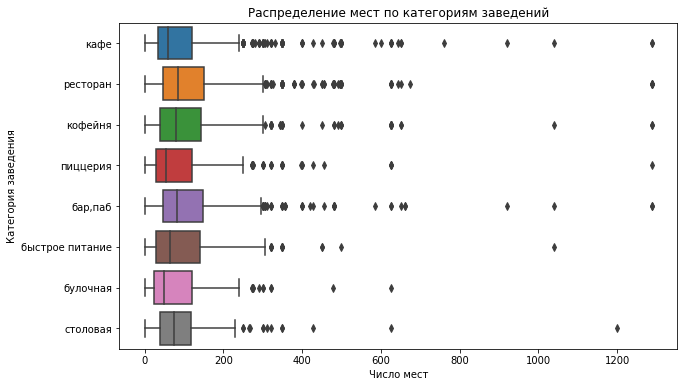

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="seats", y="category")
plt.title('Распределение мест по категориям заведений')
plt.xlabel('Число мест')
plt.ylabel('Категория заведения')
plt.show()

В данных много выбросов, поэтому используем медиану для построения распределения числа посадочных мест по категориям:

In [ ]:
seats = df.groupby(by='category')['seats'].median().reset_index().sort_values(by='seats', ascending=False)

fig = px.bar(seats, x='category', y='seats', title='Число посадочных мест по категориям заведений')
fig.update_xaxes(title_text='Категория')
fig.update_yaxes(title_text='Медианное посадочных мест')
fig.show()

Больше всего посадочных мест в барах (пабах) и ресторанах, и меньше всего, что логично, в булочных. Относительно большое число посадочных мест в булочных можно объяснить их расположением на фудкортах.

3) Рассмотрите и изобразите соотношение сетевых и несетевых заведений в датасете. Каких заведений больше?

In [ ]:
chain = df.groupby(by='chain')['name'].count().reset_index()
chain['chain'] = chain['chain'].replace([0,1],['несетевые','сетевые'])
chain

chain  name
0  несетевые  5199
1    сетевые  3203

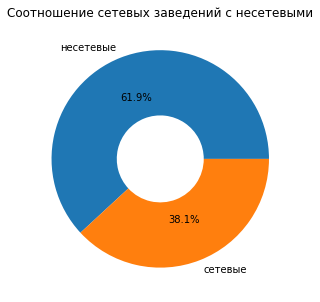

In [ ]:
vals = chain['name']
labels = chain['chain']
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=0.6))
ax.set_title('Соотношение сетевых заведений с несетевыми');

В датасете представлено больше несетевых заведений: почти 62% против 38% сетевых.

4) Какие категории заведений чаще являются сетевыми? Исследуйте данные и ответьте на вопрос графиком.  

In [ ]:
chain_1 = df.query('chain == 1').groupby('category')['chain'].count().reset_index() 
chain_all = df.groupby('category')['chain'].count().reset_index() 
chain_merge = chain_all.merge(chain_1, how='left', left_on='category', right_on='category')
chain_merge['share'] = round((chain_merge['chain_y'] / chain_merge['chain_x'] * 100),2)
chain_merge.columns = ['category', 'all', 'chain', 'chain_share']
chain_merge = chain_merge.sort_values(by='chain_share', ascending=False)
chain_merge

category   all  chain  chain_share
1         булочная   256    157        61.33
5         пиццерия   633    330        52.13
4          кофейня  1413    720        50.96
2  быстрое питание   603    232        38.47
6         ресторан  2042    729        35.70
3             кафе  2376    779        32.79
7         столовая   315     88        27.94
0          бар,паб   764    168        21.99

In [ ]:
fig = px.bar(chain_merge, x='category', y='chain_share', title='Доля сетевых заведений по категориям')
fig.update_xaxes(title_text='Категория')
fig.update_yaxes(title_text='Доля, %')
fig.show()

Чаще всего сетевыми категориями заведений являются булочные, пиццерии и кофейни.

5) Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Постройте подходящую для такой информации визуализацию. Знакомы ли вам эти сети? Есть ли какой-то признак, который их объединяет? К какой категории заведений они относятся?

In [ ]:
count_name = df.query('chain == 1').groupby(['name', 'category'], as_index = False)[['lat']].count().sort_values(by='lat', ascending=False).head(15)
count_name

name  category  lat
1142                          Шоколадница   кофейня  119
504                        Домино'с Пицца  пиццерия   76
497                            Додо Пицца  пиццерия   74
206                      One Price Coffee   кофейня   71
1158                         Яндекс Лавка  ресторан   69
73                                  Cofix   кофейня   65
242                                 Prime  ресторан   49
558                              КОФЕПОРТ   кофейня   42
644   Кулинарная лавка братьев Караваевых      кафе   39
978                               Теремок  ресторан   36
51                               CofeFest   кофейня   31
1065                              Чайхана      кафе   26
389                               Буханка  булочная   25
90                             Drive Café      кафе   24
629                             Кофемания   кофейня   22

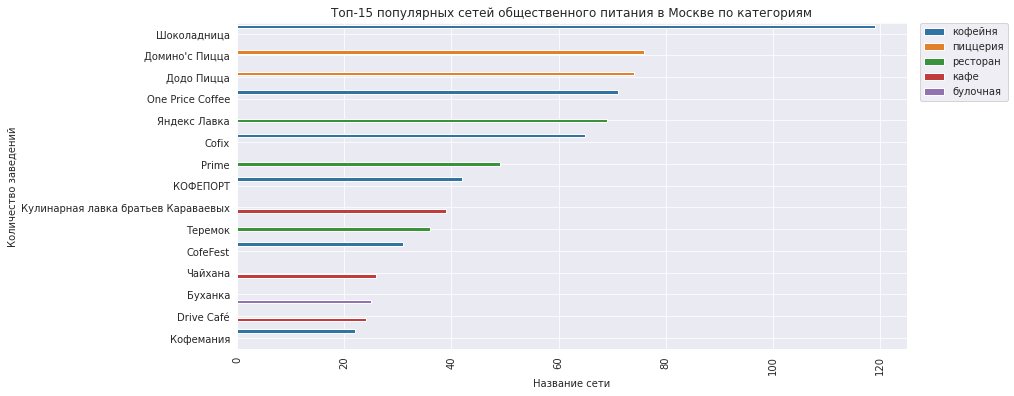

In [ ]:
# используем стиль dark из библиотеки seaborn
sns.set_style('dark')
# назначаем размер графика
plt.figure(figsize=(12, 6))
# строим столбчатый график средствами seaborn
sns.barplot(x='lat', y='name', data=count_name, hue='category')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Топ-15 популярных сетей общественного питания в Москве по категориям')
plt.xlabel('Название сети')
plt.ylabel('Количество заведений')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=90)
# выбираем положение легенды и указываем размер шрифта
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

6 позиций в топ-15 популярных заведений заняли кофейни, кроме того, в рейтинг попали кафе, рестораны, пиццерии и булочные. Все сети объединяет невысокая цена на продукцию, и широкий ассортимент.

6) Какие административные районы Москвы присутствуют в датасете? Отобразите общее количество заведений и количество заведений каждой категории по районам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [ ]:
df['district'].unique() # административные районы Москвы

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

In [ ]:
count_d = df['district'].nunique()
count_n = df['name'].count() # общее количество заведений
print(f'В {count_d} административных округах Москвы расположено {count_n} заведений.')

В 9 административных округах Москвы расположено 8402 заведений.


In [ ]:
# количество заведений каждой категории по районам
cat_to_district = df.groupby(['district', 'category'])['lat'].agg('count').reset_index().sort_values(by='lat', ascending=True)

fig = px.bar(
    cat_to_district,
    x="lat",
    y="district",
    color="category",
    text='lat',
    width=989,
    height=600)

fig.update_layout(
    title='Заведения по категориям и районам Москвы',
    xaxis_title='Количество заведений',
    yaxis_title='Округ',
    yaxis={'categoryorder':'total ascending'})

fig.show()

Большинство заведений каждой категории, что неудивительно, расположено в Центральном административном округе, меньше всего заведений представлено в Северо-Западном административном округе.  
В целом, больше всего по районам находится заведений типа "кафе", "кофейня" и "ресторан", меньше всего столовых и булочных.  
Интересно расположены пабы и бары - в ЦАО их расположено много больше, чем в других административных округах.

7) Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?

Так как рейтинг заведений ограничен значениями от 0 до 5, берем среднее по категориям:

In [ ]:
cat_to_rating = df.groupby('category')['rating'].agg('mean').reset_index().sort_values(by='rating', ascending=True)
cat_to_rating['rating'] = round((cat_to_rating['rating']),2)
cat_to_rating

category  rating
2  быстрое питание    4.05
3             кафе    4.12
7         столовая    4.21
1         булочная    4.27
4          кофейня    4.28
6         ресторан    4.29
5         пиццерия    4.30
0          бар,паб    4.39

In [ ]:
fig = px.bar(
    cat_to_rating,
    x="rating",
    y="category",
    text='rating',
    width=800,
    height=450)

fig.update_layout(
    title='Средний рейтинг по категориям заведений',
    xaxis_title='Средний рейтинг',
    yaxis_title='Тип заведений')

fig.show()

In [ ]:
min_rating = round((cat_to_rating['rating'].min()),2)
max_rating = round((cat_to_rating['rating'].max()),2)

In [ ]:
print(f'Средние рейтинги заведений Москвы находятся в диапазоне от {min_rating} до {max_rating} по пятибальной шкале, самый высокий - у баров (пабов), самый низкий - у заведений быстрого питания.')

Средние рейтинги заведений Москвы находятся в диапазоне от 4.05 до 4.39 по пятибальной шкале, самый высокий - у баров (пабов), самый низкий - у заведений быстрого питания.


8) Постройте фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы).

In [ ]:
state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson' # загружаем JSON-файл с границами округов Москвы

moscow_lat, moscow_lng = 55.751244, 37.618423 # moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы

m = Map(location=[moscow_lat, moscow_lng], zoom_start=10) # создаём карту Москвы

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

m # выводим карту

9) Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки folium.

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10) # создаём карту Москвы

marker_cluster = MarkerCluster().add_to(m) # создаём пустой кластер, добавляем его на карту

# пишем функцию, которая принимает строку датафрейма,
# создаёт маркер в текущей точке и добавляет его в кластер marker_cluster
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

df.apply(create_clusters, axis=1) # применяем функцию create_clusters() к каждой строке датафрейма

m # выводим карту

10) Найдите топ-15 улиц по количеству заведений. Постройте график распределения количества заведений и их категорий по этим улицам. Попробуйте проиллюстрировать эту информацию одним графиком.

In [ ]:
# топ-15 улиц по количеству заведений
all_streets = df.groupby('street')['name'].agg(['count']).sort_values(by='count', ascending=False)
street_top = all_streets.head(15).reset_index()
street_top

street  count
0            проспект Мира    183
1        Профсоюзная улица    122
2     проспект Вернадского    108
3       Ленинский проспект    107
4   Ленинградский проспект     95
5        Дмитровское шоссе     88
6          Каширское шоссе     77
7         Варшавское шоссе     76
8      Ленинградское шоссе     70
9                     МКАД     65
10        Люблинская улица     60
11          улица Вавилова     55
12    Кутузовский проспект     54
13    улица Миклухо-Маклая     49
14         Пятницкая улица     48

In [ ]:
array_street = np.array(street_top['street']) # массив из топ-15 улиц
df_groupby = df[df['street'].isin(array_street)].groupby(['street', 'category'])[['name']].count().reset_index().sort_values(by='name',ascending=True)

fig = px.bar(
    df_groupby,
    x="name",
    y="street",
    color="category",
    text='name',
    width=989,
    height=600)

fig.update_layout(
    title='Распределение заведений топ-15 улиц',
    xaxis_title='Количество заведений',
    yaxis_title='Округ',
    yaxis={'categoryorder':'total ascending'})

fig.show()

На большинстве топ-15 улиц по количеству заведений преобладают кафе, рестораны и кофейни, причем на проспекте Мира таких заведений больше всего. На МКАД значительно больше заведений типа "кафе" и, логично, в меньшем количестве здесь представлено ресторанов.

11) Найдите улицы, на которых находится только один объект общепита. Что можно сказать об этих заведениях?

In [ ]:
all_streets = all_streets.reset_index() # улицы, на которых находится только один объект общепита
all_streets.query('count == 1')

street  count
989            улица Фотиевой      1
990            улица Клочкова      1
991             улица Юннатов      1
992            улица Чечулина      1
993              улица Шухова      1
...                       ...    ...
1443    Павелецкая набережная      1
1444  Панкратьевский переулок      1
1445          Парусный проезд      1
1446       Певческий переулок      1
1447                      № 7      1

[459 rows x 2 columns]

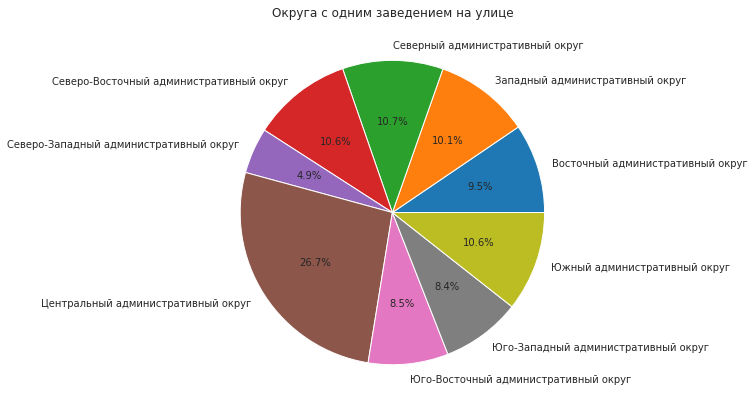

In [ ]:
one_name = np.array(all_streets['street'])
one_district = df[df['street'].isin(one_name)].groupby('district')['name'].count().reset_index()
vals = one_district['name']
labels = one_district['district']
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Округа с одним заведением на улице');

На 459 улицах находится всего один объект общепита. Большинство таких мест находится в Центральном административном округе, в остальных округах их примерно поровну, кроме улиц Северо-Западного административного округа - здесь находится примерно вдвое остальных меньше заведений, единично расположенных.

12) Значения средних чеков заведений хранятся в столбце middle_avg_bill. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитайте медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Постройте фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализируйте цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях?

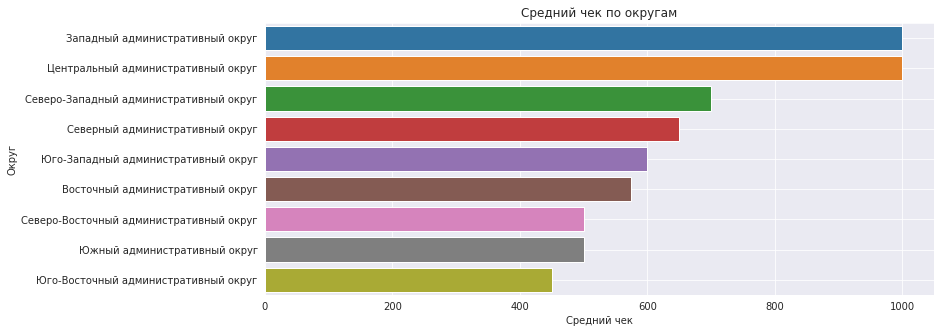

In [ ]:
avg_check = df.dropna(subset=['middle_avg_bill']).groupby('district')['middle_avg_bill'].median().reset_index().sort_values(by='middle_avg_bill', ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="middle_avg_bill", y="district", data=avg_check)
ax.set_title("Средний чек по округам")
ax.grid()
plt.xlabel('Средний чек')
plt.ylabel('Округ');

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10) # создаём карту Москвы

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=state_geo,
    data=df.dropna(subset=['middle_avg_bill']),
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний чек заведений по округам',
).add_to(m)

m # выводим карту

Центральный и Западный административные округа имеют самый высокий средний чек в заведениях, минимальный средний чек - в Юго-Восточном Административном округе.

### Общий вывод

В результате исследования датасета с заведениями общественного питания Москвы были сделаны следующие выводы:  
  
1) Больше всего в столице находится ресторанов, кафе и кофеен. Первая категория очевидно, связана с уровнем жизни города, кафе - самый универсальный вид заведения (без возрастных ограничений и с широким ассортиментом продукции), кофейни - модное место для отдыха или работы;  
2) Большее количество людей вмещают пабы (бары) и рестораны: в первые, как правило, идут большими компаниями, во вторых вместимость важна ввиду проведения здесь масштабных мероприятий;  
3) Несетевых заведений в Москве больше на 24%, чем сетевых; число ресторанов, кафе и кофеен больше, чем других типов заведений, в обеих категориях;  
4) По количеству заведений сильно вырвалась вперед "Шоколадница" - целых 119 заведений - против "Домино'с Пиццы" на втором месте с ее 76 зданиями. На третьем и четвертом месте расположились "Додо Пицца" и "One Price Coffee" соответственно. Все заведения объединяет их принадлежность к типу "кофейня" и "пиццерия";  
5) В Центральном административном округе находится с разы больше заведений почти всех типов, наоборот, в Северо-Западном административном округе их меньше всего;  
6) Медианные рейтинги заведений почти не различаются, чуть выше имеют бары (пабы), самый низкий - заведения быстрого питания и кафе;  
7) Больше всего заведений находится на проспекте Мира (183), несмотря на то, что его длина уступает Профсоюзной улице и, тем более, Ленинскому проспекту. Это можно обяснить расположением улицы в Центральном административном округе;  
8) Центральный и Западный административные округа имеют самый высокий средний чек в заведениях (1000), минимум на 30% выше других округов. Минимальный средний чек - в Юго-Восточном Административном округе (450).

### Шаг 4. Детализируем исследование: открытие кофейни  
Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробуйте определить, осуществима ли мечта клиентов.  
  
Ответьте на следующие вопросы:

1) Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?

In [ ]:
count_coffee = df.query('category == "кофейня"')['name'].count() 
print(f'В датасете {count_coffee} кофеен.')

В датасете 1413 кофеен.


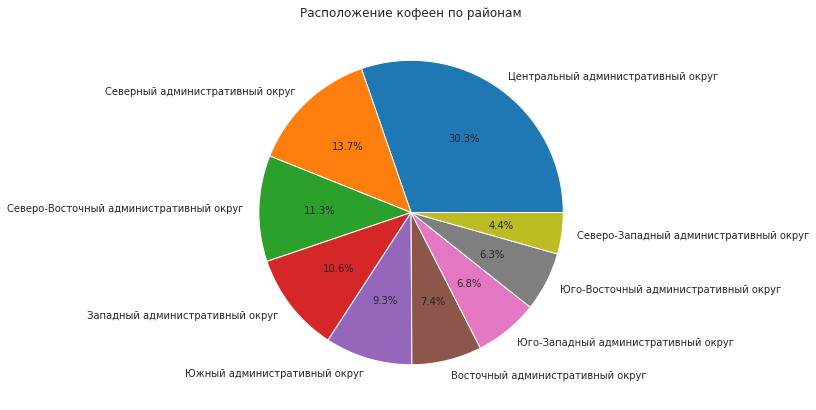

In [ ]:
coffee_district = df.query('category == "кофейня"').groupby('district')['name'].count().reset_index().sort_values(by='name', ascending=False)
vals = coffee_district['name']
labels = coffee_district['district']
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(vals, labels=labels, autopct='%1.1f%%')
ax.set_title('Расположение кофеен по районам');

Больше всего кофеен, предсказуемо, в Центральном административном округе, меньше всего в Северо-Западном административном округе.

2) Есть ли круглосуточные кофейни?  

In [ ]:
a = len(df.query('is_24_7 == True & category == "кофейня"')) # количество круглосуточных кофеен
b = len(df.query('category == "кофейня"')) # количество всех кофеен
print(f'В датасете всего {round((a / b * 100),2)}% кофеен ({a}) являются круглосуточными.')

В датасете всего 4.18% кофеен (59) являются круглосуточными.


3) Какие у кофеен рейтинги? Как они распределяются по районам?  

In [ ]:
mean_coffee = df.query('category == "кофейня"').groupby('district')[['rating']].mean().sort_values(by='rating').reset_index()
mean_coffee['rating'] = round((mean_coffee['rating']),3)

fig = px.bar(
    mean_coffee,
    x="rating",
    y="district",
    text='rating',
    width=800,
    height=450)

fig.update_layout(
    title='Средний рейтинг кофеен по округам',
    xaxis_title='Средний рейтинг',
    yaxis_title='Округ')

fig.show()

Самая высокая оценка у кофеен Центрального административного округа, самая низкая - в Западном административном округе.

4) На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?  

In [ ]:
price_coffee = df.dropna(subset=['middle_coffee_cup']).groupby('district')['middle_coffee_cup'].median().reset_index().sort_values(by='middle_coffee_cup')

fig = px.bar(
    price_coffee,
    x="middle_coffee_cup",
    y="district",
    text='middle_coffee_cup',
    width=800,
    height=450)

fig.update_layout(
    title='Стоимость чашки капучино по округам',
    xaxis_title='Медианная стоимость',
    yaxis_title='Округ')

fig.show()

Цена чашки капучино сильно зависит от района и варьируется от минимальной 135 рублей в Восточном административном округе до максимальной 197 рублей в Юго-Западном административном округе. При открытии кофейни необходимо учитывать район, в котором планируется работа заведения.

### Рекомендация для открытия нового заведения

1) При открытии кофейни рекомендую обратить внимание на три округа: Юго-Восточный, Юго-Западый и Северо-Западный. Здесь таких заведений меньше, чем в остальных округах;  
2) Цена чашки капучино сильно варьируется по округам, от 135 до 197 рублей, это необходимо учитывать при утверждении прайса;  
3) Особое внимание необходимо уделить Юго-Западному административному округу, так как здесь цена чашки капучино самая высокая.